In [94]:
import os
import numpy as np
import h5py
from glob import glob
import matplotlib.pyplot as plt

In [99]:
stats_dir = "../../results/n/job_stats"
files = glob(os.path.join(stats_dir, '*.h5'))

for f in files:
    print(os.path.basename(f))
    
filename = files[-2]
print(filename)
f = h5py.File(filename, 'r')

job_4799675.h5
job_4854847.h5
job_4853123.h5
../../results/n/job_stats/job_4854847.h5


In [100]:
print(f.keys())
print(f['Steps'].keys())
print(f['Steps']['0'].keys())
print(f['Steps']['0']['Nodes'].keys())

<KeysViewHDF5 ['Steps']>
<KeysViewHDF5 ['0', 'batch']>
<KeysViewHDF5 ['Nodes']>
<KeysViewHDF5 ['wbn039']>


In [103]:
idj = 'wbn039'
dtypes = f['Steps']['0']['Nodes'][idj]['Tasks']['0'].dtype.names
print(dtypes)
data = f['Steps']['0']['Nodes'][idj]['Tasks']['0']

cpu = []
mem = []

for i in range(len(data)):
    cpu.append(data[i][4])
    mem.append(data[i][5])
    #for k in range(len(dtypes)):        
    #    print(dtypes[k], data[i][k])
    #print('====================')
cpu = np.array(cpu) / 100
mem = np.array(mem) / (1024**2)

('ElapsedTime', 'EpochTime', 'CPUFrequency', 'CPUTime', 'CPUUtilization', 'RSS', 'VMSize', 'Pages', 'ReadMB', 'WriteMB')


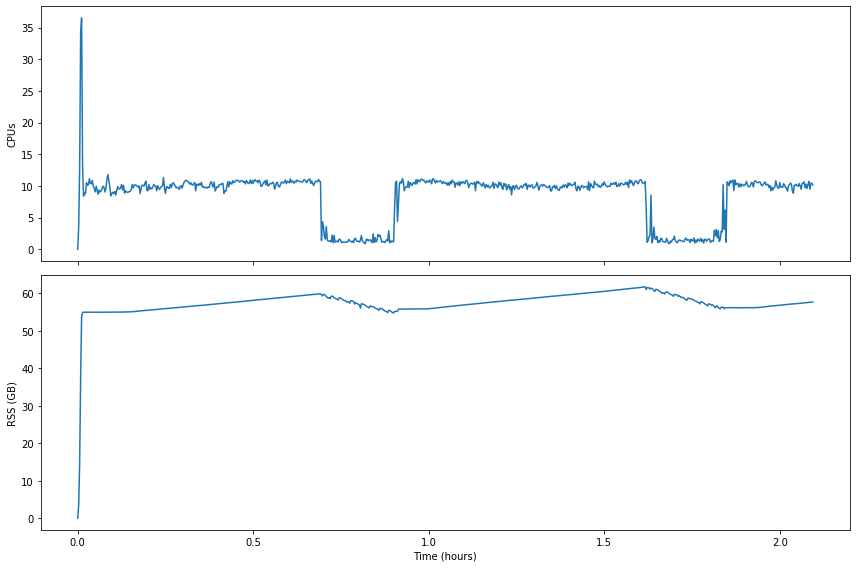

In [104]:
wallclock = np.arange(len(cpu)) * 10 / (60**2)
fig, (ax_cpu, ax_mem) = plt.subplots(2, 1, sharex=True, figsize=(12, 8))
ax_cpu.plot(wallclock, cpu)
ax_cpu.set_ylabel('CPUs')

ax_mem.plot(wallclock, mem)
ax_mem.set_ylabel('RSS (GB)')
ax_mem.set_xlabel('Time (hours)')
plt.tight_layout()
plt.show()

In [110]:
print('cpu', cpu[200:300].mean(), cpu[200:300].std(), cpu[200:300])
print('mem', mem.max())


cpu 6.06412 4.567865854597747
mem 61.705684661865234
